In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('online_retail_II.xlsx')

## 데이터 확인
- InvoiceNo: 주문번호
- StockCode: 제품코드
- Description: 제품설명
- Quantity: 주문수량
- InvoiceDate: 주문일
- UnitPrice: 제품단가
- CustomerID: 고객아이디
- Country: 국가

In [3]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
#결측치 확인
df.isnull().sum() #고객ID가 누락된 행이 10만건이다

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [6]:
#데이터 기간 확인
print(min(df['InvoiceDate']), ' | ', max(df['InvoiceDate']))

2009-12-01 07:45:00  |  2010-12-09 20:01:00


In [34]:
#월별로 date 데이터 변환
df['InvoiceDate_month'] = df['InvoiceDate'].map(lambda date: date.strftime('%Y%m'))

In [42]:
#일별로 date 데이터 변환
df['InvoiceDate_date'] = df['InvoiceDate'].map(lambda date: date.strftime('%Y%m%d'))

# 유저 분석

# Monthly Active Users
* mau 값이 2010년 초 800명~ 1000명 안팎이다가 2010년 10월에 1600명대로 급증함. 같은 해 11월까지 증가.
* 2010년 12월에 급감한 것은 데이터가 12월 9일까지 있기 때문으로 보임.

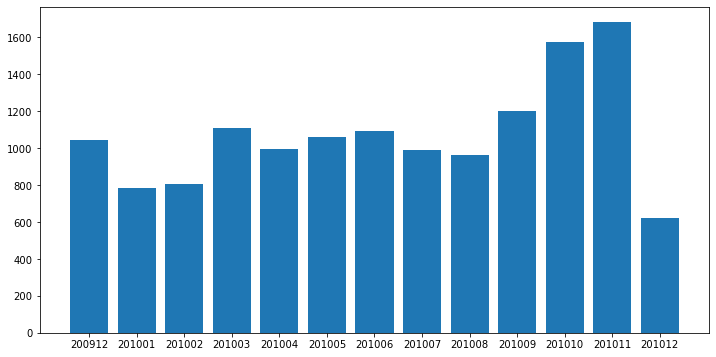

In [41]:
# MAU
mau = pd.DataFrame(df.groupby('InvoiceDate_month').nunique()['Customer ID'].reset_index())

plt.figure(figsize=(12,6))
plt.bar(mau['InvoiceDate_month'], mau['Customer ID'])
plt.show()

# Stickiness

* 유저가 많이 유입된 2010년 10월과 2010년 11월에 고착도는 감소함. (12월에 급증한 것은 역시 기간의 문제로 해석됨.)
* 신규 유저가 늘어 고착도가 다소 줄어든 것으로 보임.

In [68]:
# DAU
dau = pd.DataFrame(df.groupby('InvoiceDate_date').nunique()['Customer ID'].reset_index())

# stickiness
dau['InvoiceDate_month'] = [x[:-2] for x in dau['InvoiceDate_date']]
dam = pd.merge(dau, mau, how='left', on='InvoiceDate_month')
dam['stickiness'] = dam['Customer ID_x'] / dam['Customer ID_y'] * 100

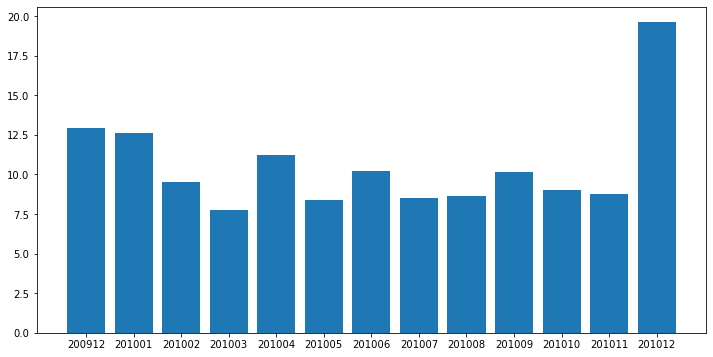

In [69]:
plt.figure(figsize=(12,6))
plt.bar(dam['InvoiceDate_month'], dam['stickiness'])
plt.show()

# 제품 판매 현황

## 주문 건수

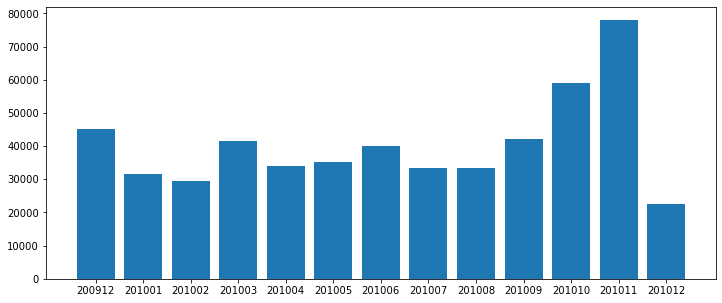

In [77]:
invoice = df.groupby('InvoiceDate_month').count()['Invoice'].reset_index()

plt.figure(figsize = (12, 5))
plt.bar(invoice['InvoiceDate_month'], invoice['Invoice'])
plt.show()

## 매출 분석

In [81]:
df['sales'] = df['Quantity'] * df['Price']
monthly_sales = df.groupby('InvoiceDate_month')['sales'].sum().reset_index()

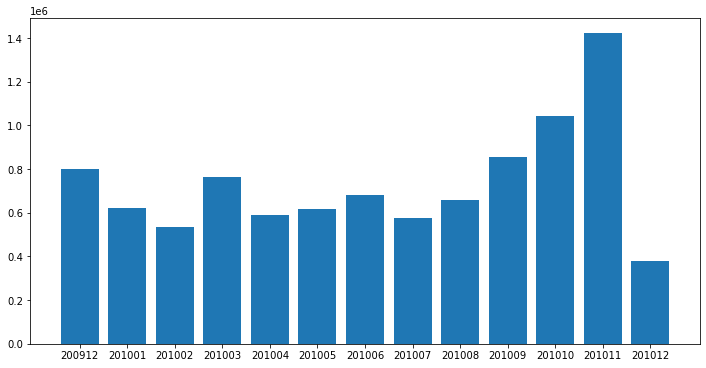

In [82]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['InvoiceDate_month'], monthly_sales['sales'])
plt.show()

## 주문 건단가
    
* 매출이 증가한 2010년 10월/11월에 건단가는 다소 감소함.

In [92]:
monthly_sales_re = pd.merge(invoice, monthly_sales, on='InvoiceDate_month')
monthly_sales_re['sales_per_order'] = monthly_sales_re['sales'] / monthly_sales_re['Invoice']

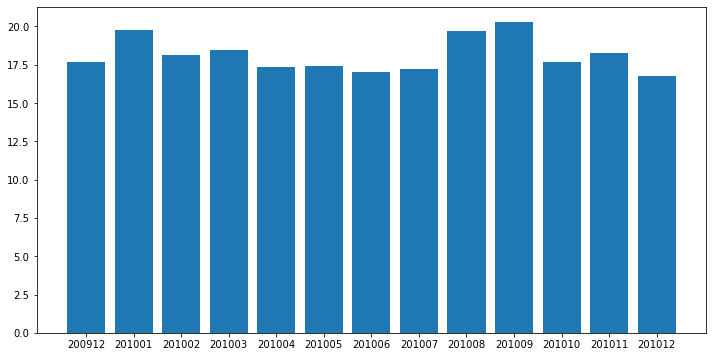

In [94]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales_re['InvoiceDate_month'], monthly_sales_re['sales_per_order'])
plt.show()